In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
data=pd.read_csv("Salary_data.csv")
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


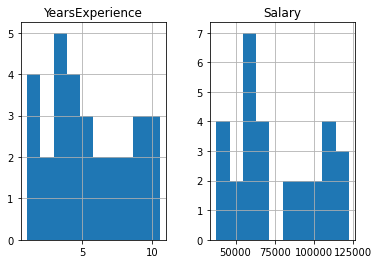

In [5]:
data.info()
data.hist()
data.describe()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

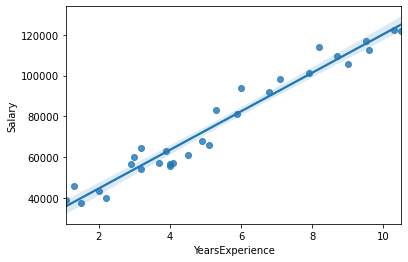

In [37]:
sns.regplot(y = 'Salary', x = 'YearsExperience' ,data = data)

In [7]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [8]:
X = data['YearsExperience']
y = data['Salary']

In [11]:
X_train,X_test,y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [12]:
X_train.shape

(21,)

In [13]:
X_test.shape

(9,)

In [15]:
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     352.9
Date:                Mon, 10 May 2021   Prob (F-statistic):           9.91e-14
Time:                        00:50:30   Log-Likelihood:                -211.80
No. Observations:                  21   AIC:                             427.6
Df Residuals:                      19   BIC:                             429.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             2.52e+04   2875.387      8.765      0.000    1.92e+04    3.12e+04
YearsExperience  9731.2038    517.993     18.786      0.000    8647.033    1.08e+04
==============================================================================
Omnibus:                        1.843   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.398   Jarque-Bera (JB):                1.106
Skew:                           0.219   Prob(JB):                        0.575
Kurtosis:                       1.964   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

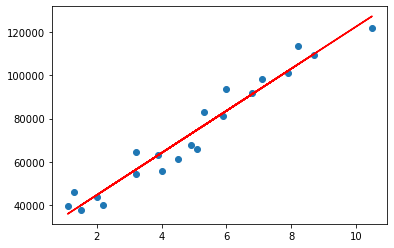

In [17]:
plt.scatter(X_train,y_train)
plt.plot(X_train, 25200 + X_train * 9731.2038,'r')
plt.show()

In [18]:
y_train_pred = model.predict(X_train_sm)

In [19]:
y_train_pred.head()

17     76778.268129
22    102079.398108
11     64127.703139
4      46611.536230
29    127380.528088
dtype: float64

In [20]:
residual = (y_train - y_train_pred)

In [21]:
residual.head()

17    6309.731871
22    -777.398108
11   -8333.703139
4    -6720.536230
29   -5508.528088
dtype: float64

C:\Users\MAX\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

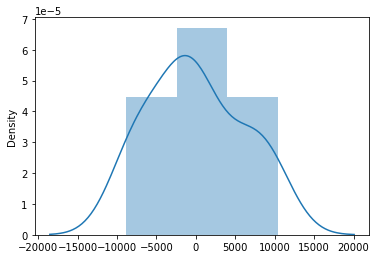

In [22]:
sns.distplot(residual)

C:\Users\MAX\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsExperience'>

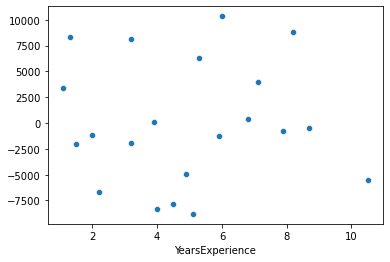

In [23]:
sns.scatterplot(X_train,residual)

In [25]:
X_test_sm = sm.add_constant(X_test)

In [26]:
y_pred = model.predict(X_test_sm)

In [28]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
RMSE

5505.479002176126

In [30]:
r2_score(y_test,y_pred)

0.962766868547327

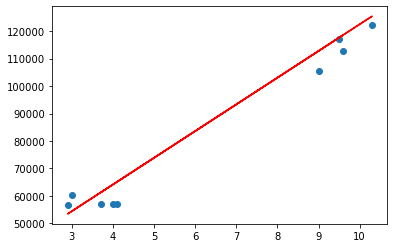

In [35]:
plt.scatter(X_test,y_test)
plt.plot(X_test, 25200 + X_test * 9731.2038,'r')
plt.show()